<h1> ELABORATO QUANTUM INFORMATION </h1>

<h5>Esposito Marcello M63001768</h5>

__________________________________________________________________________________________________________________________________

<h3>Libs</h3>

In [1]:
%pip install qiskit-aer==0.16.1
%pip install qiskit==1.3.2
%pip install qiskit-ibm-runtime==0.26.0
%pip install qiskit_experiments==0.7.0
%pip install matplotlib==3.8.4
%pip install pylatexenc==2.10
%pip install seaborn==0.13.2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit_aer import AerSimulator, QasmSimulator, StatevectorSimulator
from qiskit_experiments.library import ProcessTomography
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.quantum_info import partial_trace, Statevector, DensityMatrix, StabilizerState, purity, Choi, process_fidelity

<h3>Basic Examples</h3>

<h5> Init circuit </h5>

In [3]:
qc_1 = QuantumCircuit(1)
qc_1.x(0) # Create |1> state

qc_plus = QuantumCircuit(1)
qc_plus.h(0) # Create |+> state

<h5> Ket rapresentation </h5>

In [4]:
state_vector = Statevector(qc_1)
state_vector.draw('latex')

<IPython.core.display.Latex object>

In [5]:
state_vector = Statevector(qc_plus)
state_vector.draw('latex')

<IPython.core.display.Latex object>

<h5> Density matrix rapresentation </h5>

In [6]:
print("Density Matrix Representation:")

density_matrix = DensityMatrix(qc_1)
density_matrix.draw('latex')

Density Matrix Representation:


<IPython.core.display.Latex object>

In [7]:
density_matrix = DensityMatrix(qc_plus)
density_matrix.draw('latex')

<IPython.core.display.Latex object>

<h5> Stabilizer rapresentation </h5>

In [8]:
stabilizer_state = StabilizerState(qc_1)
print(stabilizer_state)

StabilizerState(['-Z'])


In [9]:
stabilizer_state = StabilizerState(qc_plus)
print(stabilizer_state)

StabilizerState(['+X'])


<h2> State space growht </h2>

In [10]:
# init circutis

qc_phi_plus = QuantumCircuit(2)
qc_phi_plus.h(0)
qc_phi_plus.cx(0,1)

qc_ghz = QuantumCircuit(3)
qc_ghz.h(0)
qc_ghz.cx(0,1)
qc_ghz.cx(0,2)

<h5> Density Matrix </h5> 2^n x 2^n matrix

In [11]:
density_matrix = DensityMatrix(qc_phi_plus)
print(density_matrix.dim)
density_matrix.draw('latex')

4


<IPython.core.display.Latex object>

In [12]:
density_matrix = DensityMatrix(qc_ghz)
print(density_matrix.dim)
density_matrix.draw('latex')

8


<IPython.core.display.Latex object>

<h5> Stabilizer </h5>
only n generators

In [13]:
stabilizer_state = StabilizerState(qc_phi_plus)
print(stabilizer_state)

StabilizerState(['+XX', '+ZZ'])


In [14]:
stabilizer_state = StabilizerState(qc_ghz)
print(stabilizer_state)

StabilizerState(['+XXX', '+IZZ', '+ZIZ'])


<h2>Mixed State</h2> purity always != 1

In [15]:
# Directly setup mixed state

mixed_state = (
    1/2 * DensityMatrix(qc_1)
    +
    1/2 * DensityMatrix(qc_plus)
)

print(f"Purity {purity(mixed_state)}")
mixed_state.draw('latex')



Purity (0.75+0j)


<IPython.core.display.Latex object>

In [16]:
# Get mixed state as partial trace of entangled system
qc_mixed = QuantumCircuit(2)
qc_mixed.h(0)
qc_mixed.cx(0, 1)

mixed_state = partial_trace(Statevector.from_instruction(qc_mixed), [0])
print(f"Purity {purity(mixed_state)}")
mixed_state.draw('latex')

Purity (0.4999999999999998+0j)


<IPython.core.display.Latex object>

In [17]:
# Try stabilizer rapresentation
try:
    stabilizer_state = StabilizerState(mixed_state.to_statevector())
except Exception as e:
    print(f"Conversion to StabilizerState failed: {e}")

Conversion to StabilizerState failed: 'Density matrix is not a pure state'


Non-Clifford Circuit

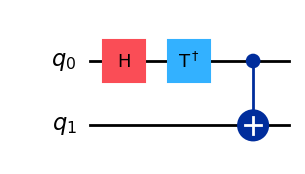

In [18]:
qc_non_clifford = QuantumCircuit(2)
qc_non_clifford.h(0)
qc_non_clifford.tdg(0) # non clifford gate
qc_non_clifford.cx(0, 1)
qc_non_clifford.draw('mpl')

In [19]:
DensityMatrix(qc_non_clifford).draw('latex')

<IPython.core.display.Latex object>

In [20]:
try:
    StabilizerState(qc_non_clifford)
except Exception as e:
    print(f"Error using stabilizer formalism: {e}")

Error using stabilizer formalism: 'Cannot update Clifford with non-Clifford gate tdg'


---

<h2>Benchmarks</h2>

<h4>Clifford circuits benchmark</h4> only H - S - CNOT

<h5>Testbench circuit & configuration</h5>

In [21]:
shots = 5 # number of simulations

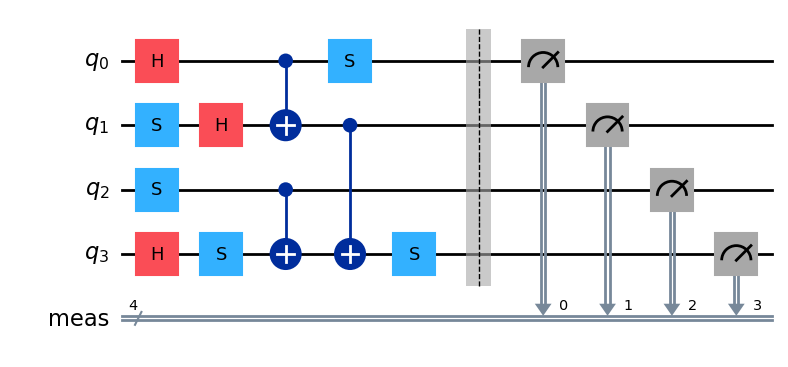

In [22]:
qc_1 = QuantumCircuit(4)

# Layer 1
qc_1.h(0)
qc_1.s(1)
qc_1.s(2)
qc_1.h(3)

# Layer 2
qc_1.h(1)
qc_1.s(3)

# Layer 3
qc_1.cx(0, 1)
qc_1.cx(2, 3)

# Layer 4
qc_1.cx(1, 3)
qc_1.s(0)

# Layer 5
qc_1.s(3)

qc_1.measure_all()

qc_1.draw('mpl')

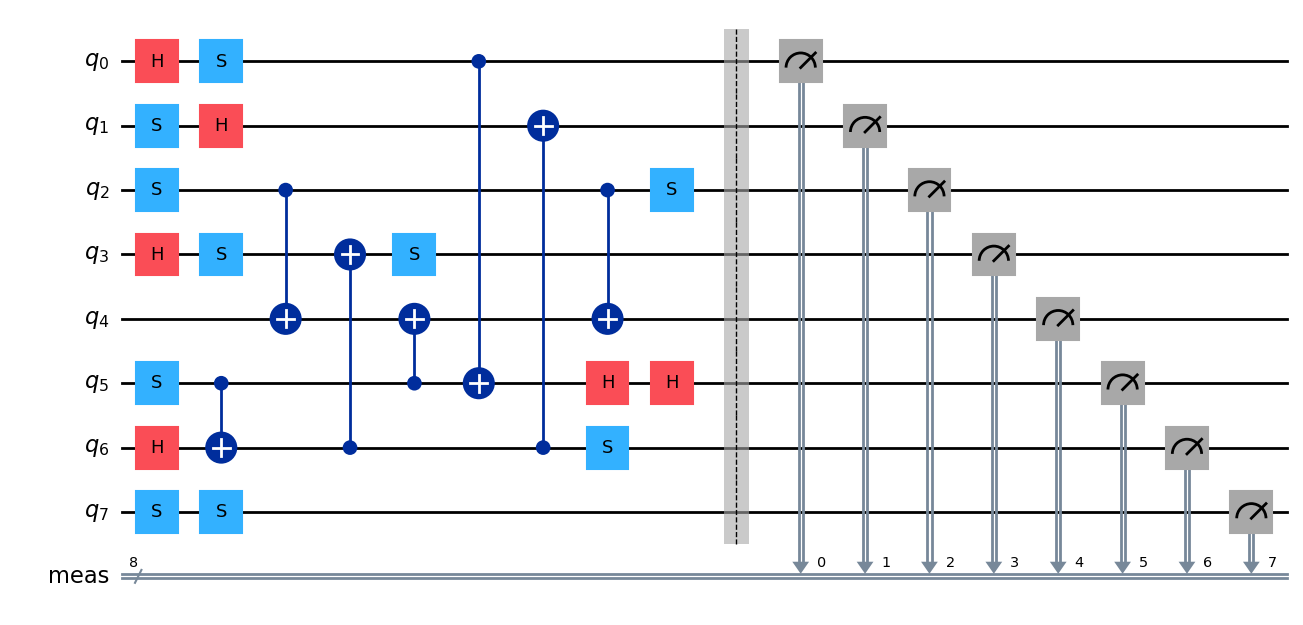

In [23]:
qc_2 = QuantumCircuit(8)

# Layer 1
qc_2.h(0)
qc_2.s(1)
qc_2.s(2)
qc_2.h(3)
qc_2.s(5)
qc_2.h(6)

# Layer 2
qc_2.h(1)
qc_2.s(3)
qc_2.cx(2, 4)
qc_2.cx(5, 6)

# Layer 3
qc_2.cx(6, 3)
qc_2.cx(5, 4)
qc_2.s(0)

# Layer 4
qc_2.cx(0, 5)
qc_2.s(7)

# Layer 5
qc_2.s(3)
qc_2.s(7)
qc_2.h(5)

qc_2.cx(6, 1)
qc_2.cx(2, 4)
qc_2.h(5)
qc_2.s(2)
qc_2.s(6)

qc_2.measure_all()

qc_2.draw('mpl')

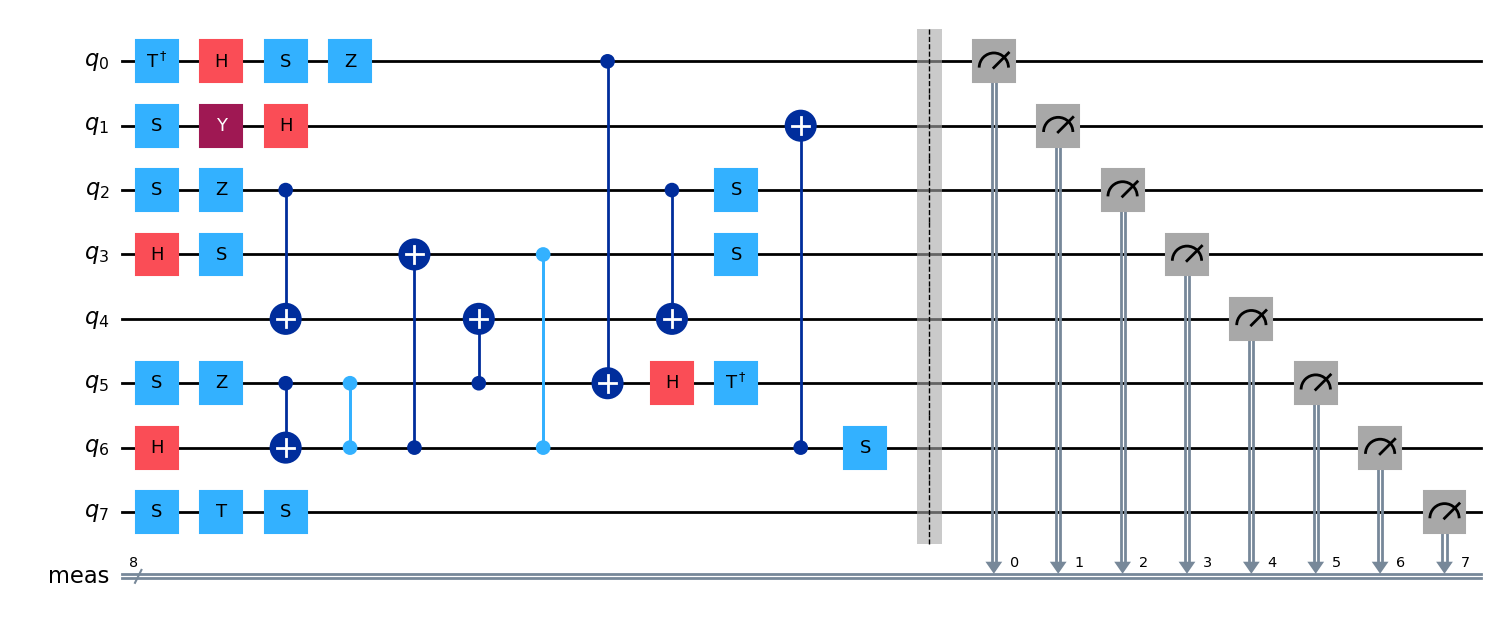

In [24]:
qc_4 = QuantumCircuit(8)

# Layer 1
qc_4.tdg(0)
qc_4.h(0)
qc_4.s(1)
qc_4.y(1)
qc_4.s(2)
qc_4.z(2)
qc_4.h(3)
qc_4.s(5)
qc_4.z(5)
qc_4.h(6)

# Layer 2
qc_4.h(1)
qc_4.s(3)
qc_4.cx(2, 4)
qc_4.cx(5, 6)
qc_4.cz(5, 6)

# Layer 3
qc_4.cx(6, 3)
qc_4.cz(6, 3)
qc_4.cx(5, 4)
qc_4.s(0)
qc_4.z(0)

# Layer 4
qc_4.cx(0, 5)
qc_4.s(7)
qc_4.t(7)

# Layer 5
qc_4.s(3)
qc_4.s(7)
qc_4.h(5)

qc_4.cx(6, 1)
qc_4.cx(2, 4)
qc_4.tdg(5)
qc_4.s(2)
qc_4.s(6)

qc_4.measure_all()

qc_4.draw('mpl')

In [25]:
# Random clifford circuit generator qc_3
import random


def random_clifford_circuit(n, depth):
    qc = QuantumCircuit(n)
    for _ in range(depth):
        for q in range(n):
            if random.choice([True, False]):
                qc.h(q)
            else:
                qc.s(q)
        # Add some entangling gates
        for i in range(n - 1):
            qc.cx(i, i + 1)
        
        qc.measure_all()
    return qc

# qc_3 = random_clifford_circuit(35, 20000)
# qc_3 = random_clifford_circuit(60, 50)
qc_3 = random_clifford_circuit(1000, 800)
# qc_3.draw('mpl')

In [26]:
# qc_to_benchmark = qc
# qc_to_benchmark = qc_2
qc_to_benchmark = qc_3
# qc_to_benchmark = qc_4

<h5>Density benchmark</h5>

In [27]:
simulator_density = AerSimulator(method="density_matrix") 
try:
    # Run the circuit simulation
    job = simulator_density.run(qc_to_benchmark, shots=shots)
    result = job.result()
    print(result)

    print(f"Method used: {result.results[0].metadata['method']}")
    print(f"Total time: {result.time_taken}")

    # counts = result.get_counts(qc_to_benchmark)
    # print(counts)
except Exception as e:
    print("error during density matrix simulation")
    print(result.status)

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] a circuit requires more memory than max_memory_mb.


Result(backend_name='aer_simulator_density_matrix', backend_version='0.16.1', qobj_id='', job_id='4914af92-ea75-4c94-b91b-a4c66210f99f', success=False, results=[ExperimentResult(shots=0, success=False, meas_level=2, data=ExperimentResultData(), status=ERROR: a circuit requires more memory than max_memory_mb., circ_id=0, seed_simulator=0, metadata={'required_memory_mb': 18446744073709551615}, time_taken=0.0)], date=2025-03-03T20:47:19.274180, status=ERROR:  [Experiment 0] a circuit requires more memory than max_memory_mb., header=None, metadata={'omp_enabled': True, 'parallel_experiments': 1, 'max_memory_mb': 16322, 'max_gpu_memory_mb': 0, 'time_taken_execute': 0.0017277, 'time_taken_parameter_binding': 0.4557813}, time_taken=44.9336416721344)
error during density matrix simulation
ERROR:  [Experiment 0] a circuit requires more memory than max_memory_mb.


<h5>Stabilizer benchmark</h5>

In [28]:
simulator_stabilizer = AerSimulator(method="stabilizer")

try:
    # Run the circuit simulation
    job = simulator_stabilizer.run(qc_to_benchmark, shots=shots)
    result = job.result()
    print(result)

    print(f"Method used: {result.results[0].metadata['method']}")
    print(f"Total time: {result.time_taken}")

    # counts = result.get_counts(qc_to_benchmark)
    # print(counts)
except Exception as e:
    print("error during stabilizer simulation")
    print(result.status)


Result(backend_name='aer_simulator_stabilizer', backend_version='0.16.1', qobj_id='', job_id='0798ed26-bc00-435c-b7e6-b71233390e0d', success=True, results=[ExperimentResult(shots=5, success=True, meas_level=2, data=ExperimentResultData(counts={'0xcb57c91512b8908472799357c8ae4e337e01ebd542efd46778adb150c67fe779a36e0e3512e99f7bedfbebf98183b62e4741ccb940d5208bf9fa76deb203d177b1d879e9a435015988520e9bad741ff80a84708101e5a8c8f9a208f38d3731234d54378351057ba4618c7f449abae9e836ef46498e8ac602363edd1bfb4aea1b0f34dcb1aeb68885bad56bd2cc9282367def207ca9cc64cb71793d6b8fe5bb52d71d9fa18c3c58365898cc1a31fb5659cb517f623e8c049b7bdfa95798d2e09a9eec1f6318befe13a9df9a262a6e8a958b823efbf9cabf19ac144b47a51ff4ca94f38d8de13294c0cdcb271a1359819a8aa8b80b06124ae34424cf3a215d7fe7cef2db8b8adf1bfd57d5b28652413024c5c845ea7df1c24594d88ee1c7803661e0d4c8ac4eeda174f452cffaea1cd187e2439419edc960fbd5fb7d21acb3071db0c94b1232af602feafeaba31e8c0e8b8ece1e498ae437fdcae5641f5a9fa0ec15a153d1485edfa828b5efc0ef8e5dda651a3cecf7c46c495

---

<h2>Process Tomography</h2>

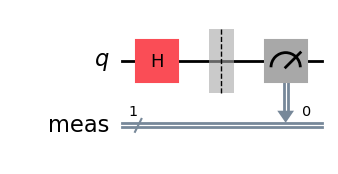

In [29]:
qc_tomo_overhead = QuantumCircuit(1)

# Layer 1
qc_tomo_overhead.h(0)
# qc_tomo.s(1)

qc_tomo_overhead.measure_all()

qc_tomo_overhead.draw('mpl')

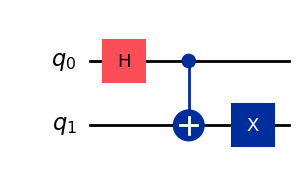

In [30]:
# Crea un circuito quantistico con 2 qubit
qc_tomo = QuantumCircuit(2)

# Layer 1: Crea entanglement
qc_tomo.h(0)
qc_tomo.cx(0, 1)

# Layer 2: Aggiungi una porta singola
qc_tomo.x(1)

# Misura tutti i qubit
# qc_tomo.measure_all()

qc_tomo.draw('mpl')

In [31]:
# qc_to_ps_tomo = qc_tomo_overhead
qc_to_ps_tomo = qc_tomo

<h5>Density matrix</h5>

In [32]:
simulator_density = AerSimulator(method="density_matrix") 

circuit_tomo_density = ProcessTomography(qc_to_ps_tomo, simulator_density)

res = circuit_tomo_density.run(simulator_density, shots=100)
experimental_result = res.analysis_results("state").value # Experimental choi matrix

fidelity = process_fidelity(channel=experimental_result, target=Choi(qc_to_ps_tomo), require_tp=False)

print('Process Fidelity: F = {:.5f}'.format(fidelity))

Process Fidelity: F = 0.92079


<h5>Stabilizer</h5>

In [33]:
simulator_stabilizer = AerSimulator(method="stabilizer") 

circuit_tomo_stabilizer = ProcessTomography(qc_to_ps_tomo, simulator_stabilizer)

res = circuit_tomo_stabilizer.run(simulator_stabilizer, shots=10)

if not len(res.data()): 
    print("Stabilizer formalism not currently supported from qiskit")

Provider for ExperimentData object doesn't exist, resulting in a failed attempt to retrieve data from the server; no stored result data exists


---

<h2>Quantum Error Correction</h2>

<h5>Setup 1 + 2 qubit channel</h5>

In [34]:
q_number = 3

q_logical = QuantumRegister(1, 'Message')
q_ancillas_sender = QuantumRegister(q_number - 1, 'Alice\'s ancilla')
q_ancillas_receiver = QuantumRegister(q_number - 1, 'Bob\'s ancilla')
c_measure_result = ClassicalRegister(q_number - 1, 'Error Syndrome')

qc_qec = QuantumCircuit(q_logical, q_ancillas_sender, q_ancillas_receiver, c_measure_result)

# set logical qubit to |1>
qc_qec.x(0)

# distribute state
for q in range(1,q_number):
    qc_qec.cx(0, q)

qc_qec.barrier(range(q_number), label="|111>")

# ERROR PHASE

# simulate error X, Y or Z on a single qubit
errors = [qc_qec.x, qc_qec.y, qc_qec.z]

# random version
# for q in range(q_number):
#     if random.getrandbits(1):
#             random.choice(errors)(q)
#             break

# test version
qc_qec.x(1)



# ERROR SYNDROME PHASE

for q in range(3, 5):
    qc_qec.h(q)

# XZZXI
qc_qec.cz(0, 3)  
qc_qec.cz(0, 4) 

qc_qec.barrier(range((q_number * 2) - 1))  
qc_qec.cz(1, 3)  
qc_qec.cz(1, 4) 

qc_qec.barrier(range((q_number * 2) - 1))  

# Final Hadamard and measurement gates to extract the syndrome
for q in range(3, 5):
    qc_qec.h(q)  # Apply Hadamard to ancilla qubits to complete the syndrome extraction
    qc_qec.measure(q, q - 3)  # Measure ancilla qubits and store results in classical bits


# setup receiver circuit
qc_qec.draw('mpl', plot_barriers=True)

# Simulate the circuit using AerSimulator
simulator = AerSimulator()
job = simulator.run(qc_qec, shots=9)
result = job.result()

# Get the counts from the simulation
counts = result.get_counts(qc_qec)

# Print the counts (which are the classical register values)
print(counts)

{'11': 9}


In [39]:
# 5 qubit quantum error correction

# INIT PHASE
q_number = 5

q_logical = QuantumRegister(1, 'Logical qubit')

q_ancillas_sender = QuantumRegister(q_number - 1, 'Alice\'s ancilla')
q_ancillas_receiver = QuantumRegister(q_number - 1, 'Bob\'s ancilla')
c_measure_result = ClassicalRegister(q_number - 1, 'Error Syndrome')

qc_qec = QuantumCircuit(q_logical, q_ancillas_sender, q_ancillas_receiver, c_measure_result)

# Set logical qubit in super position (Comment out if you want only |0>)
# rand_amplitude = random.random()
# a = math.sqrt(rand_amplitude)
# b = math.sqrt((1 - rand_amplitude))
# qc_qec.initialize([a, b], 0)


qc_qec.barrier(range(q_number), label="a|0>+b|1>")

# ENCODING LOGICAL QUBIT PHASE

qc_qec.h(0)               
qc_qec.cz(0, 1)          
qc_qec.cz(0, 3)          
qc_qec.cx(0, 4)          
qc_qec.cz(0, 4)          

qc_qec.barrier(range(q_number))
qc_qec.h(1)               
qc_qec.cz(1, 2)          
qc_qec.cz(1, 3)          
qc_qec.cx(1, 4)              

qc_qec.barrier(range(q_number))
qc_qec.h(2)               
qc_qec.cz(2, 0)          
qc_qec.cz(2, 1)          
qc_qec.cx(2, 4)                  

qc_qec.barrier(range(q_number))
qc_qec.h(3)               
qc_qec.cz(3, 0)          
qc_qec.cz(3, 2)          
qc_qec.cx(3, 4)      
qc_qec.cz(3, 4)  

qc_qec.barrier(range(q_number), label="|ψ⟩L")


# NOISE PHASE

# Simulate error X, Y or Z on a single qubit
errors = [qc_qec.x, qc_qec.y, qc_qec.z]
# random version
# for q in range(q_number):
#     if random.getrandbits(1):
#             random.choice(errors)(q)
#             break

# Manually set error
qc_qec.y(0)


qc_qec.barrier(range((q_number * 2) - 1), label="Channel")


# ERROR SYNDROME PHASE

for q in range(5, 9):
    qc_qec.h(q)

# XZZXI
qc_qec.cx(5, 0)
qc_qec.cz(5, 1)
qc_qec.cz(5, 2)
qc_qec.cx(5, 3)

qc_qec.barrier(range((q_number * 2) - 1)) 

# IXZZX
qc_qec.cx(6, 1)
qc_qec.cz(6, 2)
qc_qec.cz(6, 3)
qc_qec.cx(6, 4)

qc_qec.barrier(range((q_number * 2) - 1))

# XIXZZ
qc_qec.cx(7, 0)
qc_qec.cx(7, 2)
qc_qec.cz(7, 3)
qc_qec.cz(7, 4)

qc_qec.barrier(range((q_number * 2) - 1))

# ZXIXZ
qc_qec.cz(8, 0)
qc_qec.cx(8, 1)
qc_qec.cx(8, 3)
qc_qec.cz(8, 4)

qc_qec.barrier(range((q_number * 2) - 1))

for q in range(5, 9):
    qc_qec.h(q) 

qc_qec.measure(5, 3)
qc_qec.measure(6, 2)
qc_qec.measure(7, 1)
qc_qec.measure(8, 0)


qc_qec.draw('mpl', plot_barriers=True)

# simulate circuit (comment everything below to draw it instead)
simulator = AerSimulator()
job = simulator.run(qc_qec, shots=100)
result = job.result()

counts = result.get_counts(qc_qec)

error_syndrome_lut = {
    "0001": "X1",
    "1010": "Z1",
    "1011": "Y1",
    "1000": "X2",
    "0101": "Z2",
    "1101": "Y2",
    "1100": "X3",
    "0010": "Z3",
    "1110": "Y3",
    "0110": "X4",
    "1001": "Z4",
    "1111": "Y4",
    "0011": "X5",
    "0100": "Z5",
    "0111": "Y5"
}
print(counts)

print(f"Error found: {error_syndrome_lut[list(counts)[0]]}")
print(f"Total time: {result.time_taken}")

{'1011': 100}
Error found: Y1
Total time: 0.0029637813568115234
